In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [2]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [5]:
### Your code is here
data.nunique()

Gender                     2
Age                       64
Driving_License            2
Region_Code               53
Previously_Insured         2
Vehicle_Age                3
Vehicle_Damage             2
Annual_Premium          7341
Policy_Sales_Channel      98
Vintage                  290
Response                   2
dtype: int64

In [6]:
data.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,10000,10000,10000
unique,2,3,2
top,Male,1-2 Year,Yes
freq,5437,5263,5143


In [11]:
onehot_columns = data.describe(include='object').columns

In [14]:
data = pd.get_dummies(data, columns=onehot_columns, drop_first=True)

<AxesSubplot:>

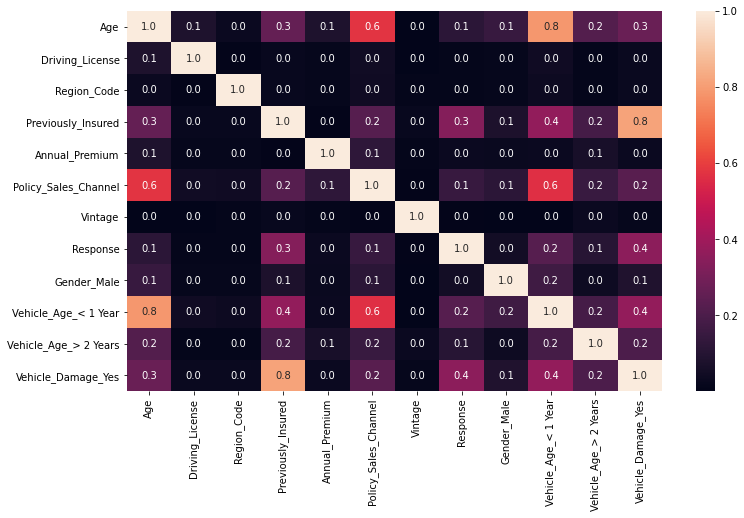

In [18]:
fig = plt.figure()
fig.set_size_inches(12, 7)
sns.heatmap(data=abs(data.corr()), annot=True, fmt=".1f")

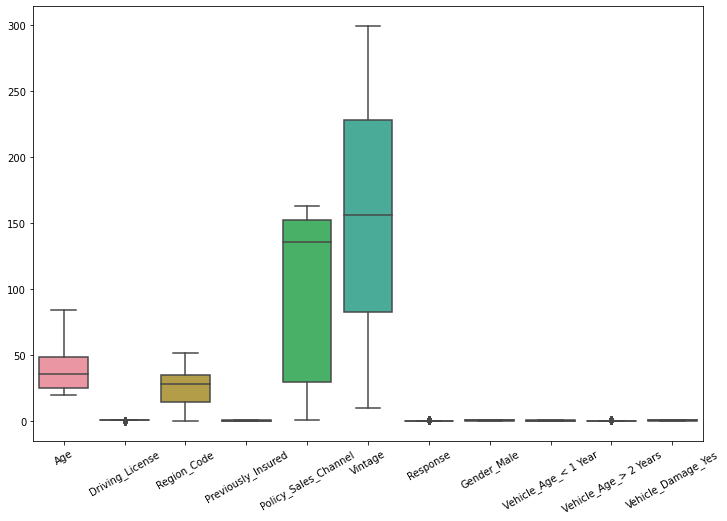

In [26]:
fig = plt.figure()
fig.set_size_inches(12, 8)
sns.boxplot(data=data.drop(columns=['Annual_Premium']))
plt.xticks(rotation=30)
# plt.ylim(6, 11)

plt.show()

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    shuffle=True,
                                                    test_size=0.2)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here

model = GradientBoostingClassifier(learning_rate=1,n_estimators=100,random_state=1)


In [29]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

In [33]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.91925, 0.855)

In [37]:
print(classification_report(y_test, model.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.902     0.937     0.919      1765
           1      0.335     0.238     0.279       235

    accuracy                          0.855      2000
   macro avg      0.619     0.588     0.599      2000
weighted avg      0.836     0.855     0.844      2000



In [35]:
from sklearn.metrics import recall_score, precision_score
print(precision_score(y_test,  model.predict(X_test)), recall_score(y_test,  model.predict(X_test)))


0.33532934131736525 0.23829787234042554


In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

0.9468629593136512


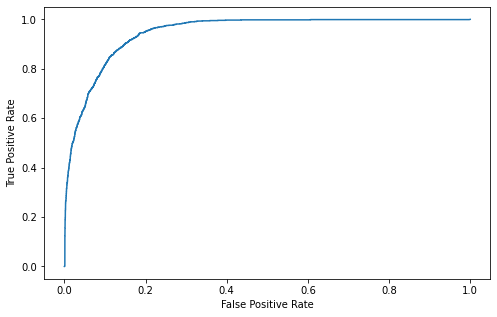

In [39]:
### На трейне
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(auc(fpr, tpr))

0.8259007895847146


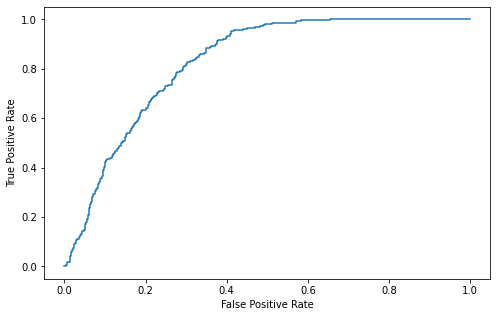

In [41]:
### На тесте
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(auc(fpr, tpr))

In [44]:
f1_score(y_test, model.predict(X_test), average='weighted')

0.8441065240777769

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [45]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [85]:
### Your code is here
f1_map = dict()
mse_map = dict()
acc_map = dict()
df_map = {'learning_rate': [], 'n_estimators': [], 'f1': []}

for lr in learning_rate_list:
    
    f1_map[lr] = dict()
    mse_map[lr] = dict()
    acc_map[lr] = dict()
        
    for n_e in n_estimators_list:

        model_grid = GradientBoostingClassifier(learning_rate=lr,n_estimators=n_e, max_depth=5,random_state=1)
        model_grid.fit(X_train, y_train)

        predict = model_grid.predict(X_test)

        f1_map[lr][n_e] = f1_score(y_test, predict, average='weighted')
        mse_map[lr][n_e] = mean_squared_error(y_test, predict)
        acc_map[lr][n_e] = model_grid.score(X_test, y_test)

        df_map['learning_rate'] += [lr]
        df_map['n_estimators'] += [n_e]
        df_map['f1'] += [f1_score(y_test, predict, average='weighted')]


In [86]:
f1_df = pd.DataFrame(df_map)

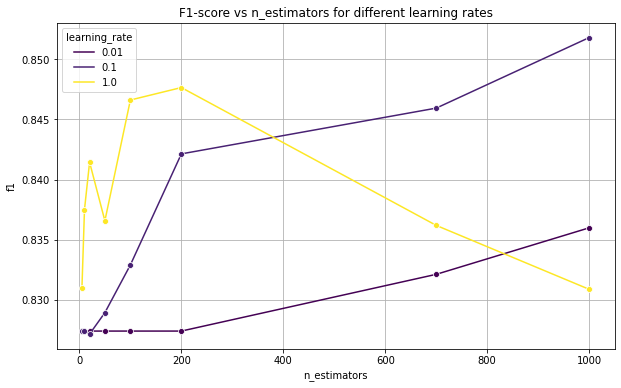

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=f1_df,
    x='n_estimators',
    y='f1',
    hue='learning_rate',
    marker='o',
    palette='viridis'
)
plt.title('F1-score vs n_estimators for different learning rates')
plt.grid(True)
plt.show()

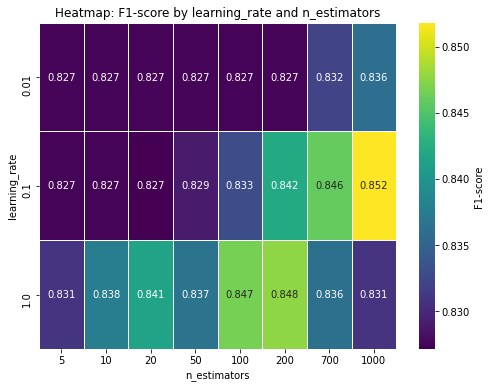

In [103]:
heatmap_data = f1_df.pivot_table(
    index='learning_rate',
    columns='n_estimators',
    values='f1',
    aggfunc='mean'  # если есть дубликаты, можно использовать mean/max
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap='viridis',
    linewidths=0.5,
    cbar_kws={'label': 'F1-score'}
)
plt.title('Heatmap: F1-score by learning_rate and n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.show()

In [110]:
for k,v in f1_map.items():
    print(k, max(v.values()))

1 0.8476452336583865
0.1 0.8517973248037221
0.01 0.83599407815928


**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [111]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]
df_data = {'f1': [], 'n_e': [], 'model': [], 'deep': []}

for n_e in n_estimators_list:
    rf5_m = RandomForestClassifier(n_estimators=n_e ,max_depth=5, random_state=1)
    rf5000_m = RandomForestClassifier(n_estimators=n_e ,max_depth=5000, random_state=1)
    bs5_m = GradientBoostingClassifier(n_estimators=n_e, max_depth=5,random_state=1)
    bs5000_m = GradientBoostingClassifier(n_estimators=n_e, max_depth=5000,random_state=1)
    
    rf5_m.fit(X_train, y_train)
    rf5000_m.fit(X_train, y_train)
    bs5_m.fit(X_train, y_train)
    bs5000_m.fit(X_train, y_train)
    
    df_data['n_e'].append(n_e)
    df_data['f1'].append(f1_score(y_test, rf5_m.predict(X_test), average='weighted'))
    df_data['model'].append('random_forest_5')
    df_data['deep'].append(5)
    
    df_data['n_e'].append(n_e)
    df_data['f1'].append(f1_score(y_test, rf5000_m.predict(X_test), average='weighted'))
    df_data['model'].append('random_forest_5000')
    df_data['deep'].append(5000)
    
    df_data['n_e'].append(n_e)
    df_data['f1'].append(f1_score(y_test, bs5_m.predict(X_test), average='weighted'))
    df_data['model'].append('boosting_5')
    df_data['deep'].append(5)
    
    df_data['n_e'].append(n_e)
    df_data['f1'].append(f1_score(y_test, bs5000_m.predict(X_test), average='weighted'))
    df_data['model'].append('boosting_5000')
    df_data['deep'].append(5000)


In [129]:
bost_forest = pd.DataFrame(df_data)

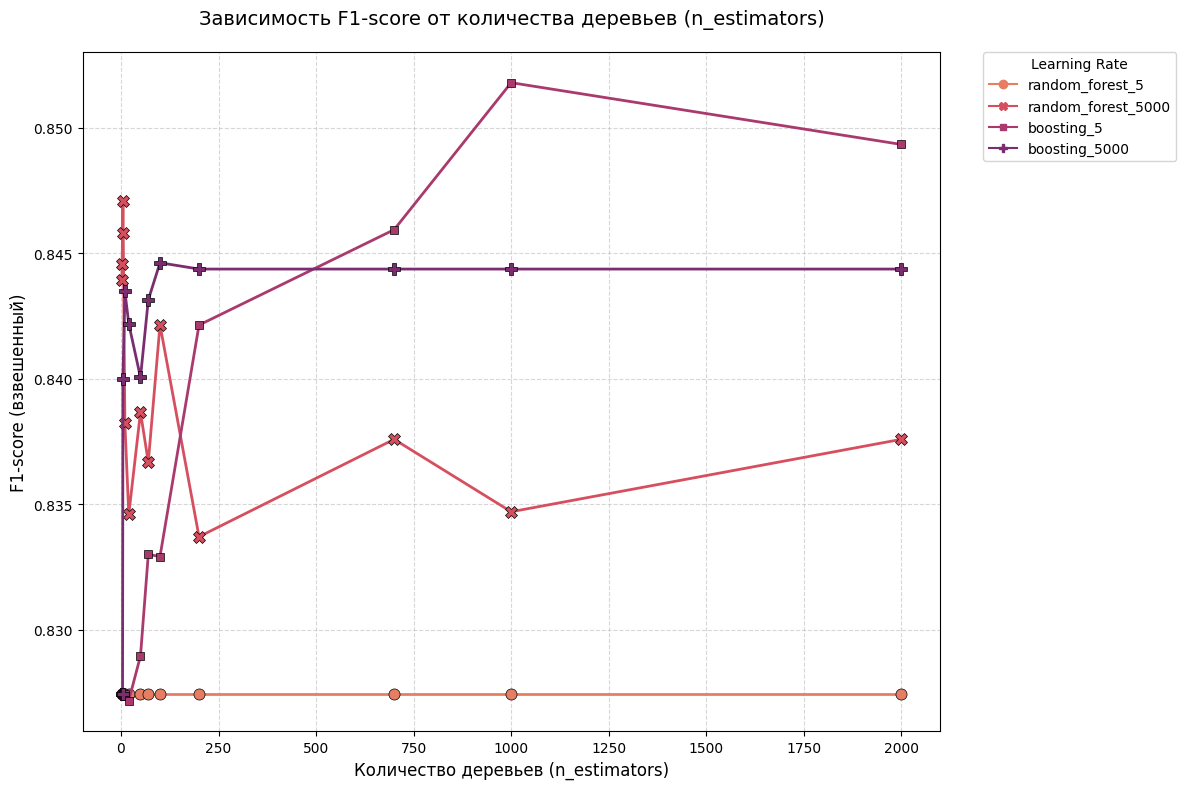

In [122]:
plt.figure(figsize=(12, 8), dpi=100)  # Четкое разрешение

# Строим график
ax = sns.lineplot(
    data=bost_forest,
    x='n_e',
    y='f1',
    hue='model',
    style='model',  # Разные стили линий для лучшего различения
    markers=True,   # Маркеры для каждой точки
    dashes=False,   # Сплошные линии (без пунктира)
    palette="flare",  # Красивая цветовая схема
    linewidth=2,     # Толщина линий
    markersize=8,    # Размер маркеров
    markeredgecolor='black',  # Обводка маркеров
    markeredgewidth=0.5,      # Толщина обводки
)

# Настройка заголовка и подписей
plt.title(
    'Зависимость F1-score от количества деревьев (n_estimators)',
    fontsize=14,
    pad=20  # Отступ заголовка
)
plt.xlabel('Количество деревьев (n_estimators)', fontsize=12)
plt.ylabel('F1-score (взвешенный)', fontsize=12)

# Настройка сетки
plt.grid(True, linestyle='--', alpha=0.5)  # Пунктирная сетка с прозрачностью

# Легенда (выносим за пределы графика, если мешает)
plt.legend(
    title='Learning Rate',  # Название легенды
    bbox_to_anchor=(1.05, 1),  # Сдвигаем вправо
    loc='upper left',          # Позиционируем сверху
    borderaxespad=0.           # Убираем отступы
)

# Оптимизация расположения элементов
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

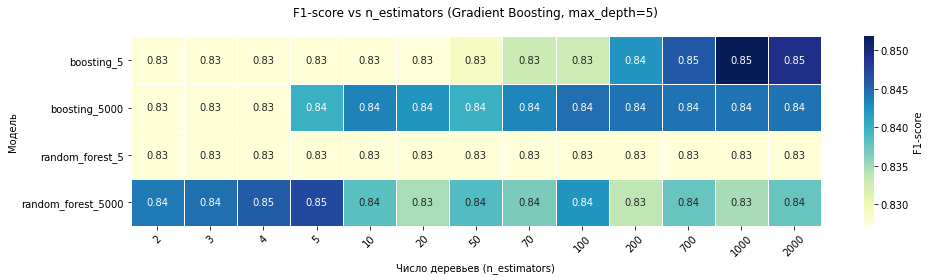

In [131]:
# Pivot таблица
heatmap_data = bost_forest.pivot_table(index='model', columns='n_e', values='f1')

# Heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'F1-score'}
)

plt.title("F1-score vs n_estimators (Gradient Boosting, max_depth=5)", pad=20)
plt.xlabel("Число деревьев (n_estimators)")
plt.ylabel("Модель")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [ ]:
!pip install ipywidgets ipython

In [133]:
### Your code is here
data2 = pd.read_csv('vehicle_insurance.csv')

X2 = data2.drop(columns=['Response'])
y2 = data2.Response

In [139]:
from catboost import CatBoostClassifier


cat_features = X2.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                    random_state=1,
                                                    shuffle=True,
                                                    test_size=0.2)


cat_b = CatBoostClassifier(cat_features=cat_features, verbose=100)
cat_b.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.052963
0:	learn: 0.6071797	test: 0.6066597	best: 0.6066597 (0)	total: 54.7ms	remaining: 54.7s
100:	learn: 0.2574237	test: 0.2620518	best: 0.2620518 (100)	total: 1.47s	remaining: 13.1s
200:	learn: 0.2400374	test: 0.2626923	best: 0.2619931 (104)	total: 2.88s	remaining: 11.4s
300:	learn: 0.2234364	test: 0.2644548	best: 0.2619931 (104)	total: 4.36s	remaining: 10.1s
400:	learn: 0.2092233	test: 0.2656024	best: 0.2619931 (104)	total: 5.76s	remaining: 8.6s
500:	learn: 0.1968610	test: 0.2681797	best: 0.2619931 (104)	total: 7.23s	remaining: 7.2s
600:	learn: 0.1869799	test: 0.2694808	best: 0.2619931 (104)	total: 8.63s	remaining: 5.73s
700:	learn: 0.1766656	test: 0.2718185	best: 0.2619931 (104)	total: 10.1s	remaining: 4.31s
800:	learn: 0.1672567	test: 0.2736593	best: 0.2619931 (104)	total: 11.5s	remaining: 2.86s
900:	learn: 0.1594379	test: 0.2762133	best: 0.2619931 (104)	total: 13s	remaining: 1.43s
999:	learn: 0.1515414	test: 0.2790047	best: 0.2619931 (104)	total: 14.5s	rema

In [142]:
y_pred = cat_b.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

F1 Score: 0.8274


In [143]:
cat_b.feature_importances_

array([ 4.06013021,  8.28888655,  0.04531996,  4.91509345, 33.67361667,
        4.95699498, 31.62313078,  4.30760129,  4.18639369,  3.94283242])

In [146]:
feature_importance = pd.DataFrame({
    'feature': X2.columns,
    'importance': cat_b.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВажные признаки:")
print(feature_importance.head(10))


Важные признаки:
                feature  importance
4    Previously_Insured   33.673617
6        Vehicle_Damage   31.623131
1                   Age    8.288887
5           Vehicle_Age    4.956995
3           Region_Code    4.915093
7        Annual_Premium    4.307601
8  Policy_Sales_Channel    4.186394
0                Gender    4.060130
9               Vintage    3.942832
2       Driving_License    0.045320


In [152]:
feature_importance_grad = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

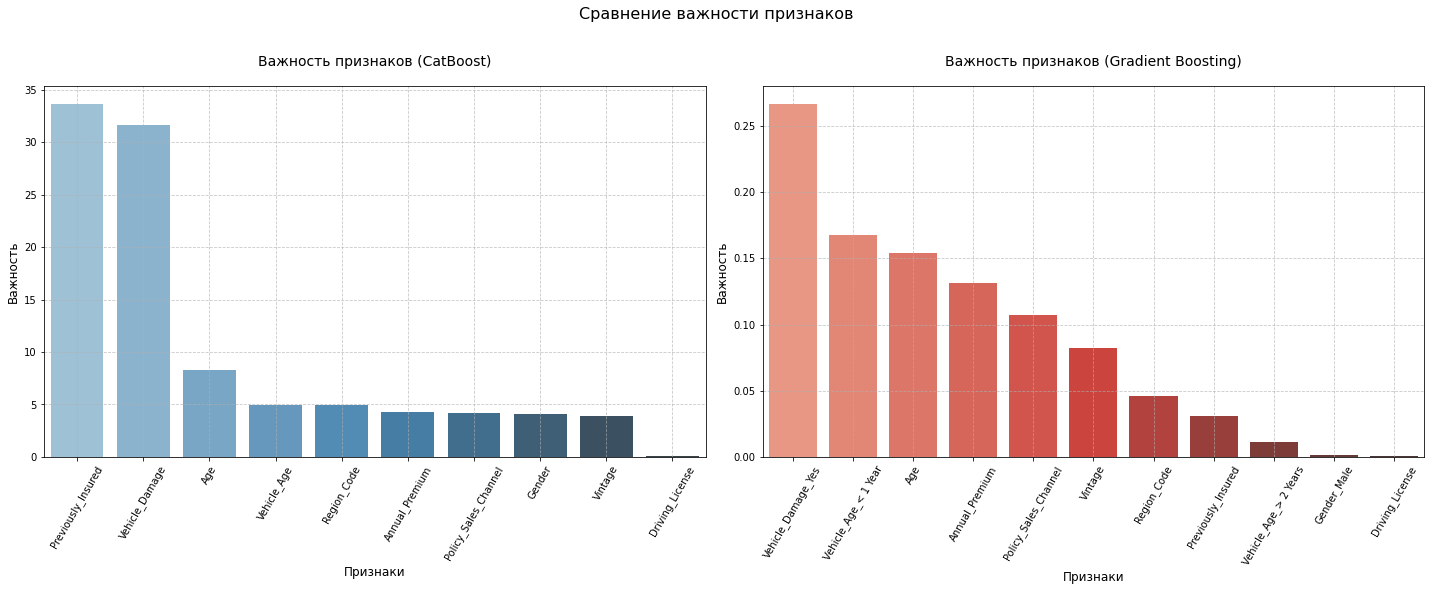

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру с двумя субплoтами (1 строка, 2 столбца)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Первый график (CatBoost)
sns.barplot(
    data=feature_importance, 
    x='feature', 
    y='importance', 
    ax=ax1,  # Указываем ось
    palette='Blues_d'
)
ax1.set_title('Важность признаков (CatBoost)', pad=20, fontsize=14)
ax1.set_xlabel('Признаки', fontsize=12)
ax1.set_ylabel('Важность', fontsize=12)
ax1.tick_params(axis='x', rotation=60)
ax1.grid(True, linestyle='--', alpha=0.7)

# Второй график (Gradient Boosting)
sns.barplot(
    data=feature_importance_grad, 
    x='feature', 
    y='importance', 
    ax=ax2,  # Указываем ось
    palette='Reds_d'
)
ax2.set_title('Важность признаков (Gradient Boosting)', pad=20, fontsize=14)
ax2.set_xlabel('Признаки', fontsize=12)
ax2.set_ylabel('Важность', fontsize=12)
ax2.tick_params(axis='x', rotation=60)
ax2.grid(True, linestyle='--', alpha=0.7)

# Общие настройки
plt.suptitle('Сравнение важности признаков', y=1.02, fontsize=16)
plt.tight_layout()  # Автоматическая регулировка отступов
plt.show()

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

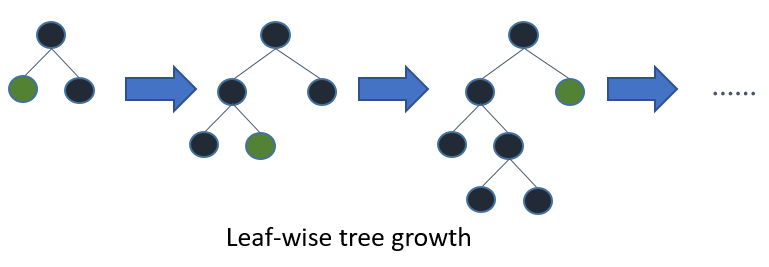

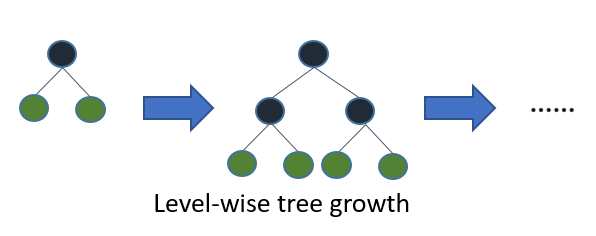

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [156]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    shuffle=True,
                                                    test_size=0.2)



In [157]:
grid_model = GridSearchCV(LGBMClassifier(), params)

In [158]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]})

In [160]:
grid_model.best_score_

0.873625

In [163]:
results = pd.DataFrame(grid_model.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088530,0.030341,0.023595,0.029425,0.1,2,100,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.873750,0.873125,0.871250,0.873125,0.873125,0.872875,0.000848,25
1,0.387052,0.032690,0.051120,0.036653,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.870625,0.871250,0.865000,0.869375,0.868750,0.869000,0.002187,33
2,0.829838,0.098693,0.069702,0.029813,0.1,2,1000,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.865625,0.868125,0.860625,0.865000,0.866875,0.865250,0.002550,34
3,1.883051,0.237375,0.082411,0.029864,0.1,2,2000,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.855625,0.850625,0.857500,0.854375,0.856875,0.855000,0.002437,40
4,0.173277,0.033658,0.003610,0.001394,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.873125,0.873750,0.870000,0.873125,0.871250,0.872250,0.001403,28


In [165]:
grid_model.best_params_

{'learning_rate': 0.001, 'max_depth': 100, 'n_estimators': 2000}

In [169]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [171]:
y_predict = grid_model.predict(X_test)

In [172]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1765
           1       0.33      0.00      0.01       235

    accuracy                           0.88      2000
   macro avg       0.61      0.50      0.47      2000
weighted avg       0.82      0.88      0.83      2000

